In [124]:
import logging

import numpy as np
import torch
import tqdm
from torch import nn
from torch.autograd import Variable
from sklearn.metrics import roc_auc_score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.cluster import KMeans
import seaborn as sns
from obp.dataset import SyntheticBanditDataset
from obp.policy import IPWLearner
from obp.ope import (
    OffPolicyEvaluation,
    RegressionModel,
    InverseProbabilityWeighting as IPW,
    DirectMethod as DM,
    DoublyRobust as DR,
)
from obp.policy import IPWLearner, NNPolicyLearner
from obp.dataset import MultiClassToBanditReduction
from sklearn.model_selection import train_test_split

In [125]:
class Net(nn.Module):
    def __init__(self, num_questions, hidden_size, num_layers):
        super(Net, self).__init__()
        self.hidden_dim = hidden_size
        self.layer_dim = num_layers
        self.lstm = nn.LSTM(num_questions * 2, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_dim, num_questions)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim,  self.hidden_dim))
        c0=  Variable(torch.zeros(self.layer_dim,  self.hidden_dim))
        out, (a,b)= self.lstm(x, (h0,c0))
        res = torch.sigmoid(self.fc(out))
        
        return res,out


In [126]:
with open('orderprob.pkl','rb') as f:
    orderprob=pickle.load(f)

In [127]:
with open('diffikrobo.pkl','rb') as f:
    diffik=pickle.load(f)

In [128]:
with open('student_theta.pkl','rb') as f:
    student_theta=pickle.load(f)

In [129]:
df=pd.read_csv('attempts.csv')

In [130]:
df.problem=orderprob


In [131]:
student_l={}
for j in df.student.unique():
    student_l[j]=df[df.student==j][['problem','solved']]

In [132]:
rr=pd.Series(index=df.student.unique())
for j in df.student.unique():
    rr.loc[j]=len(df[df.student==j])
        

/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_27465/2636701054.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rr=pd.Series(index=df.student.unique())


In [133]:
list_index={}
for j in range(50):
    
    list_index[j]=rr[rr>j].index
    

we create a column for the reward by difficulty

In [134]:
q=np.zeros(len(df))
q=-diffik[df.problem]+diffik.max()
q=q*df.solved.values
df['reward']=q.values

we load our encoded vector and our LSTM 

In [135]:
with open('good_list.pkl', 'rb') as f:
    good_list= pickle.load(f)
    

In [137]:
lstm=Net(85,5,1)
lstm.load_state_dict(torch.load('weightslstm2.pth'))

<All keys matched successfully>

In [138]:
context_l={}
outi={}
for j in df.student.unique():
    
    outi[j],context_l[j]=lstm(good_list[j])

In [325]:
for j in df.student.unique():
    
    dicpandareal[j]['oldk']=np.r_[0,dicpandareal[j].kmean.values[:-1]]

In [148]:
def progress_people(x):

    for j in range(2,len(outi[x]),3):
        plt.plot(outi[x][j].detach().numpy(),'.',label='time'+str(j))
        plt.legend()

In [183]:
dr=pd.read_csv('events.csv')

In [192]:
dr.sort_values(by='student')

,id,event_order,timestamp,event_type,student,problem,attempt,program,correct,time_from_attempt_start,tools
917,999,918,2017-11-17 09:08:36.412314+00:00,edit,5,26,129,f,NaN,4,robomission:1.0
918,1000,919,2017-11-17 09:08:38.153408+00:00,edit,5,26,129,fr,NaN,6,robomission:1.0
919,1001,920,2017-11-17 09:08:39.049752+00:00,edit,5,26,129,frl,NaN,6,robomission:1.0
920,1002,921,2017-11-17 09:08:42.141466+00:00,execution,5,26,129,frl,True,10,robomission:1.0
0,11,1,2017-11-10 12:20:16.989121+00:00,edit,29,2,4,l,NaN,11,robomission:1.0
...,...,...,...,...,...,...,...,...,...,...,...
4630108,4636984,4630109,2020-10-01 17:26:20.238421+00:00,execution,32252,14,308261,llrrr,False,32,robomission:1.1
4630109,4636985,4630110,2020-10-01 17:26:23.505713+00:00,edit,32252,14,308261,llr,NaN,36,robomission:1.1
4630110,4636986,4630111,2020-10-01 17:26:25.985684+00:00,edit,32252,14,308261,NaN,NaN,38,robomission:1.1
4630099,4636975,4630100,2020-10-01 17:25:43.986729+00:00,execution,32252,44,308260,lff,True,16,robomission:1.1


In [186]:
plt.figure(figsize=(30,10))
dr.groupby('problem').agg(len).solved.sort_values(ascending=False).plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'solved'

<Figure size 3000x1000 with 0 Axes>

/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_27465/1036037801.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_62dm4livko/croot/pytorch_1675190252673/work/aten/src/ATen/native/TensorShape.cpp:2985.)
  plt.plot(a[0].T.detach().numpy())


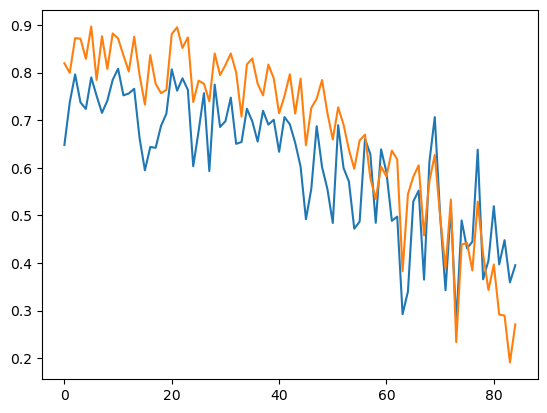

In [157]:
plt.plot(a[0].T.detach().numpy())
plt.plot(a[-1].T.detach().numpy())

In [158]:
paramss={ j:b for j,b in lstm.named_parameters()}


In [114]:
def min_length_string(strings):
    # Filter out non-string values and then find the minimum length string
    valid_strings = [s for s in strings if isinstance(s, str)]
    return min(valid_strings, key=len) if valid_strings else None

In [159]:
paramss

{'lstm.weight_ih_l0': Parameter containing:
 tensor([[-0.1736,  0.9117,  0.9991,  ...,  0.1821, -0.3114,  0.0622],
         [ 0.2633, -0.5998,  0.9863,  ..., -0.6128,  0.4375, -0.0339],
         [-0.3545,  0.0453, -0.5685,  ..., -0.9068, -0.3735, -0.4929],
         ...,
         [-0.2122,  0.0721, -0.3521,  ..., -0.3073, -0.9348, -0.8058],
         [-0.4475,  0.3822,  0.2529,  ..., -0.4057, -1.0967, -0.7259],
         [-0.5743, -0.4307, -0.3260,  ..., -0.0419, -1.0378, -0.2606]],
        requires_grad=True),
 'lstm.weight_hh_l0': Parameter containing:
 tensor([[ 0.6107,  0.4546, -0.4855,  0.0388,  0.1659],
         [ 0.6036, -0.1934, -0.3417,  0.0691, -0.3006],
         [-0.1976,  0.7163, -0.1404,  0.2454, -0.1615],
         [ 0.6514,  0.3346, -0.4404,  0.5130,  0.1175],
         [-0.0325,  0.5369, -0.7533,  0.5004, -0.0927],
         [-0.4828, -0.4296, -0.1442,  0.0767, -0.1669],
         [ 0.0745,  0.1151,  0.0824,  0.2632,  0.3131],
         [ 0.4655,  0.0541, -0.2748,  0.0720, -0.7

In [327]:
fr=[]
for j in list_index[49]:
    fr.append(dicpandareal[j].iloc[-2:,-2:].values)

In [116]:
qzz=df.groupby(['problem','solved']).program.agg(min_length_string)

In [121]:
best_exo=pd.Series({i: qzz.loc[i,True] for i,_ in qzz.index})

In [123]:
best_exo[:50]

1                    rrff
2                     sff
3                     lff
4                    rssf
5                     lrf
6                  frllrr
7                     rrf
8                     frl
9                     rrl
10                    frl
11                    rff
12              lllffrrrf
13                  R3{r}
14                      f
15                  R8{s}
16                    rrl
17                   Wk{}
18                 R6{sf}
19           lllfffffflll
20        R4{f}R3{l}R4{f}
21             R4{r}R4{l}
22            R4{l}R4{r}f
23                R4{sr}f
24             Wy{r}Wk{f}
25                  W{lr}
26                 rrslrf
27                lsrrlll
28               sllfrsss
29             Wk{fWd{s}}
30                fR4{r}f
31            Wk{f}W!b{l}
32                 frllrf
33           Wd{l}Wk{r}ff
34              slflllsrf
35             R2{rrllrl}
36      slllslffrrrrllllf
37         R2{R3{r}R3{l}}
38               fR4{fr}f
39          

In [329]:
def filter_arrays(arr):
    filtered_arr = []

    for sub_arr in arr:
        element_count = np.bincount(sub_arr.flatten())
        
        for count in element_count:
            if count == 3:
                filtered_arr.append(sub_arr)
                break

    return filtered_arr
er=np.array(filter_arrays(np.array(fr)))


In [330]:
er

array([[[20, 25],
        [20, 20]],

       [[20, 28],
        [20, 20]],

       [[48, 48],
        [11, 48]],

       [[ 8,  8],
        [20,  8]],

       [[29, 29],
        [ 2, 29]],

       [[29, 29],
        [ 2, 29]],

       [[ 2,  2],
        [27,  2]],

       [[ 5,  5],
        [ 8,  5]],

       [[25, 25],
        [20, 25]],

       [[11, 11],
        [48, 11]],

       [[ 5, 33],
        [ 5,  5]],

       [[ 8,  8],
        [28,  8]],

       [[21, 21],
        [40, 21]],

       [[40, 21],
        [40, 40]],

       [[40, 21],
        [40, 40]],

       [[48, 48],
        [20, 48]],

       [[ 8, 28],
        [ 8,  8]],

       [[16, 32],
        [16, 16]],

       [[40, 40],
        [11, 40]],

       [[ 2,  2],
        [29,  2]],

       [[ 8,  8],
        [20,  8]],

       [[13, 45],
        [13, 13]],

       [[32, 33],
        [32, 32]],

       [[16, 16],
        [33, 16]],

       [[ 5,  8],
        [ 5,  5]],

       [[25,  8],
        [25, 25]],

       [[48,

In [99]:
ce={}
for j in np.arange(0,50):
    ve=[]
    for k in list_index[j]:
        
        
        
    
        
    
    
        ve.append(dicpandareal[k].loc[j,['action','reward','kmean','oldk']])
    ce[j]=ve 

In [253]:
voller={}
for j in np.arange(50):
    
    voller[j]=pd.DataFrame(data=np.array(ce[j]).reshape(-1, 4),columns=['action','reward','kmean','oldk'],index=list_index[j])

In [256]:
voller.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [245]:
dex=voller[1].groupby(['oldk','action','kmean'],as_index=True).agg('mean')


In [252]:
voller[10].groupby(['oldk'],as_index=False)['reward'].agg('mean').sort_values('reward')

,oldk,reward
21,38.0,1.422880
8,16.0,1.634786
19,33.0,1.704612
18,32.0,1.853981
7,14.0,1.912965
23,44.0,1.941051
26,49.0,1.961107
10,19.0,2.018519
0,2.0,2.072601
6,13.0,2.073647


In [248]:
voller[10].groupby(['oldk','action'],as_index=True).agg('mean')

reward      kmean
oldk action                     
2.0  1.0     0.000000  20.000000
     2.0     0.151802  21.166667
     3.0     0.654011   2.000000
     4.0     0.713911  24.300000
     5.0     0.876341  21.000000
...               ...        ...
49.0 65.0    5.496537  29.000000
     67.0    5.580898  49.000000
     73.0    6.069147  29.000000
     77.0    0.000000   9.000000
     84.0    0.000000  29.000000

[916 rows x 2 columns]

In [244]:
dex.loc[1,84]

,reward
kmean,
3.0,3.882148
15.0,0.000000
42.0,7.764295


In [180]:
cr=dex.loc[:,['kmean','reward']].groupby('reward',as_index=False).agg([min,max])
v=dex[dex.oldk==1]
v[v.action==84]

KeyError: "['kmean'] not in index"

In [278]:
r=dbfreal.groupby('kmean')['reward'].agg('mean').sort_values().index.values

In [282]:
V={r[j]:j for j in range(len(r))}

dbfreal['kmean']=dbfreal['kmean'].map(V)

In [287]:
dbfreal.oldk=np.r_[0,dbfreal.kmean.values[:-1]]

In [305]:
V

{43: 0,
 15: 1,
 4: 2,
 35: 3,
 39: 4,
 41: 5,
 17: 6,
 10: 7,
 42: 8,
 23: 9,
 12: 10,
 26: 11,
 31: 12,
 0: 13,
 18: 14,
 37: 15,
 30: 16,
 6: 17,
 36: 18,
 13: 19,
 3: 20,
 24: 21,
 22: 22,
 45: 23,
 44: 24,
 14: 25,
 38: 26,
 49: 27,
 19: 28,
 46: 29,
 1: 30,
 9: 31,
 29: 32,
 2: 33,
 34: 34,
 27: 35,
 47: 36,
 33: 37,
 32: 38,
 40: 39,
 16: 40,
 5: 41,
 7: 42,
 20: 43,
 25: 44,
 11: 45,
 21: 46,
 8: 47,
 28: 48,
 48: 49}

we create our bandit dataset for a bernouilli reward and a real reward

In [15]:
colums=np.r_[np.array(['feature'+str(j) for j in range(1,6)]),['action','reward']]
dicpandabern={}
dicpandareal={}
for j in df.student.unique():
    m=df[df.student==j]
    dicpandabern[j]=pd.DataFrame(data=np.c_[context_l[j].detach().numpy(),m[['problem','solved']].values],columns=colums)
    dicpandareal[j]=pd.DataFrame(data=np.c_[context_l[j].detach().numpy(),m[['problem','reward']].values],columns=colums)
    

In [20]:
for j in df.student.unique():
    dicpandareal[j]['kmean']=kmean.predict(dicpandareal[j][[ 'feature1', 'feature2', 'feature3','feature4','feature5']])

In [262]:
dbfbern=pd.concat([dicpandabern[j] for j in df.student.unique()],axis=0)
dbfreal=pd.concat([dicpandareal[j] for j in df.student.unique()],axis=0)

In [19]:
kmean=KMeans(n_clusters=50)
kmean.fit(dbfbern[[ 'feature1', 'feature2', 'feature3','feature4','feature5']])
nex_conte=kmean.predict(dbfbern[[ 'feature1', 'feature2', 'feature3','feature4','feature5']])

/opt/homebrew/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [120]:
dbfbern=dbfbern.drop([ 'feature1', 'feature2', 'feature3','feature4','feature5'],axis=1)
dbfbern['context']=nex_conte

In [290]:
empire_proba_real=pd.DataFrame(index=dbfreal.oldk.sort_values().unique(),columns=np.arange(1,86))

In [291]:
    for j in dbfreal.oldk.sort_values().unique():
        
        empire_proba_real.loc[j]=(np.bincount(dbfreal[dbfreal.oldk==j].action,minlength=86)/len(dbfreal[dbfreal.oldk==j].action))[1:]    

,feature1,feature2,feature3,feature4,feature5,action,reward,kmean,oldk
0,0.394584,0.210884,-0.470114,0.319509,0.292778,5.0,0.876341,18,0
1,0.754796,0.401564,-0.797582,0.721282,0.567110,1.0,0.000000,16,18
2,0.898192,0.518146,-0.915428,0.899905,0.731111,2.0,0.151802,9,16
3,0.937335,0.561550,-0.948032,0.944385,0.797626,8.0,1.082906,7,9
4,0.946384,0.545007,-0.958345,0.953253,0.820612,15.0,2.151526,27,7
...,...,...,...,...,...,...,...,...,...
10,0.955429,0.593414,-0.962273,0.959842,0.838181,64.0,0.000000,25,24
0,0.394386,0.223345,-0.464544,0.321251,0.294564,14.0,2.006935,30,25
1,0.752186,0.439335,-0.789627,0.721043,0.571681,3.0,0.654011,8,30
2,0.895998,0.560174,-0.912459,0.899266,0.736459,8.0,1.082906,10,8


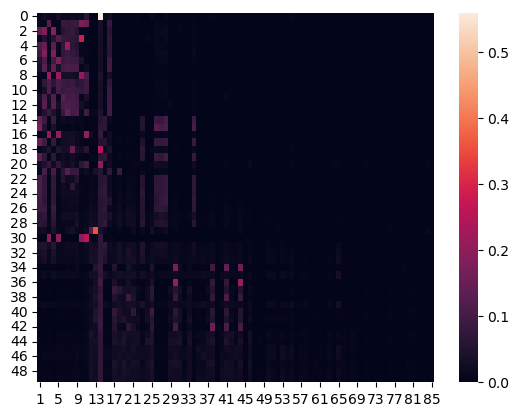

In [310]:
sns.heatmap(empire_proba_real.astype(float))
(dbfreal.oldk==13)
dbfreal

In [306]:
mol=[]
import seaborn as sns
for i in range(1,30):
    
    mol.append(empire_proba_real.loc[:,range(1,i)].sum(axis=1).sort_values(ascending=False)[:50])

[0     0.0
 37    0.0
 27    0.0
 28    0.0
 29    0.0
 30    0.0
 31    0.0
 32    0.0
 33    0.0
 34    0.0
 35    0.0
 36    0.0
 38    0.0
 1     0.0
 39    0.0
 40    0.0
 41    0.0
 42    0.0
 43    0.0
 44    0.0
 45    0.0
 46    0.0
 47    0.0
 48    0.0
 26    0.0
 25    0.0
 24    0.0
 23    0.0
 2     0.0
 3     0.0
 4     0.0
 5     0.0
 6     0.0
 7     0.0
 8     0.0
 9     0.0
 10    0.0
 11    0.0
 12    0.0
 13    0.0
 14    0.0
 15    0.0
 16    0.0
 17    0.0
 18    0.0
 19    0.0
 20    0.0
 21    0.0
 22    0.0
 49    0.0
 dtype: float64,
 15    0.175586
 14    0.146171
 17    0.140571
 2     0.134714
 19    0.129391
 22    0.112630
 23    0.108606
 4     0.107570
 24    0.107557
 25    0.095714
 5     0.090881
 26    0.089920
 28    0.063242
 27    0.055918
 6     0.049597
 31    0.043801
 7     0.036695
 11    0.035887
 32    0.029334
 29    0.026201
 12    0.022486
 20    0.020536
 33    0.018069
 21    0.012146
 13    0.011765
 3     0.011619
 1     0.010972
 

In [149]:
dbfbern.context=dbfbern.context.replace(mol[7].index[:7].values,np.arange(0,7))


In [23]:
dbfbern['kmean']=nex_conte

We use MultiClassToBanditReduction from OBP to find the behavior policy

In [86]:
y=dbfbern['action'].astype(int)-1
datasetbern = MultiClassToBanditReduction(
    X=dbfbern[[ 'feature1', 'feature2', 'feature3','feature4','feature5']],
    y=y,
    base_classifier_b=LogisticRegression(random_state=12345),
    alpha_b=0.8,
    n_deficient_actions=0
 
)
y=dbfbern['action'].astype(int)-1
datasetreal = MultiClassToBanditReduction(
    X=dbfreal[[ 'feature1', 'feature2', 'feature3','feature4','feature5']],
    y=y,
    base_classifier_b=LogisticRegression(random_state=12345),
    alpha_b=0.8,
    n_deficient_actions=0
 
)
datasetbern.split_train_eval(eval_size=0.7, random_state=12345)
datasetreal.split_train_eval(eval_size=0.7, random_state=12345)
bandit_feedback_train_bern = datasetbern.obtain_batch_bandit_feedback(random_state=1234)
bandit_feedback_train_real = datasetreal.obtain_batch_bandit_feedback(random_state=1234)
bandit_feedback_train_bern.pop('n_actions')
bandit_feedback_train_bern.pop('n_rounds')
bandit_feedback_train_bern.pop('position')
bdf_train_bern={}
bdf_test_bern={}
for a,b in bandit_feedback_train_bern.items():
    bdf_train_bern[a],bdf_test_bern[a]=train_test_split(b,random_state=0,test_size=0.5)
bdf_train_bern['n_rounds']=bdf_train_bern['context'].shape[0]
bdf_train_bern['n_actions']=85
bdf_test_bern['n_actions']=85
bdf_test_bern['n_rounds']=bdf_test_bern['context'].shape[0]
bdf_train_bern['position']=None
bdf_test_bern['position']=None    

bandit_feedback_train_real.pop('n_actions')
bandit_feedback_train_real.pop('n_rounds')
bandit_feedback_train_real.pop('position')
bdf_train_real={}
bdf_test_real={}
for a,b in bandit_feedback_train_real.items():
    bdf_train_real[a],bdf_test_real[a]=train_test_split(b,random_state=0,test_size=0.5)
bdf_train_real['n_rounds']=bdf_train_real['context'].shape[0]
bdf_train_real['n_actions']=85
bdf_test_real['n_actions']=85
bdf_test_real['n_rounds']=bdf_test_real['context'].shape[0]
bdf_train_real['position']=None
bdf_test_real['position']=None    


/opt/homebrew/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Text(0.5, 0, 'problems ranked by difficulty')

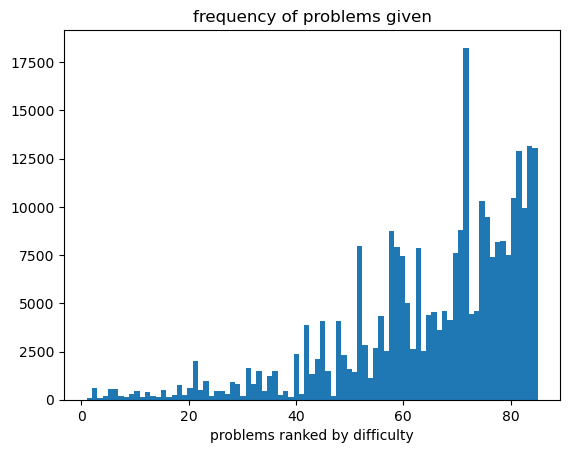

In [100]:
plt.hist(dbfbern['action'].values.astype(int),bins=85)
plt.title('frequency of problems given')
plt.xlabel('problems ranked by difficulty')

Other method we use a Linear regression to find the behavior policy with a Softmax to have a distribution We could possibly use a Lasso Regression to have a less sparse policy

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression(fit_intercept=False)
onhot=OneHotEncoder()
fel=onhot.fit_transform(dbfbern.action.values.reshape(-1,1))
lr.fit(dbfbern[[ 'feature1', 'feature2', 'feature3','feature4','feature5']],fel.toarray())


LinearRegression(fit_intercept=False)

In [20]:
lm=lr.predict(dbfbern[[ 'feature1', 'feature2', 'feature3','feature4','feature5']])


In [21]:
actions=lr.predict(dbfbern[[ 'feature1', 'feature2', 'feature3','feature4','feature5']])
softmax=nn.Softmax(dim=1)
log_actions=softmax(torch.tensor(actions))

With a Neural Network ( in progress)

In [346]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(5, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 85),
            
        )

    def forward(self, x):
        
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [351]:
learning_rate = 5e-2
batch_size = 64
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [356]:
dbfbern_train,dbfbern_test=train_test_split(dbfbern,test_size=0.25)

X_1=dbfbern_train[[ 'feature1', 'feature2', 'feature3','feature4','feature5']].values.reshape(5641*38,5)




qs=OneHotEncoder().fit_transform(dbfbern_train['action'].values.reshape(-1,1))
qs=qs.toarray().reshape(5641*38,85)

In [328]:
loss_fn(model(X_1[0]),torch.eye(85)[:38])

tensor(4.4627, grad_fn=<DivBackward1>)

In [357]:
X_1=torch.Tensor(X_1.astype(float))
y_1=torch.Tensor(qs.astype(int))

In [358]:
for i in range(100):
    
    model.train()
    for  X, y in zip(X_1,y_1):
        # Compute prediction and loss
        pred = model(X)
        
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        loss = loss.item()
    print(loss, 'epoch'+str(i))


3.8596434593200684 epoch0
3.8595516681671143 epoch1
3.8595476150512695 epoch2
3.859654426574707 epoch3


KeyboardInterrupt: 

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [22]:
dbfbern_train,dbfbern_test=train_test_split(dbfbern,test_size=0.33)

In [33]:
dbfreal_train,dbfreal_test=train_test_split(dbfreal,test_size=0.33)

Making the bandit dataset usable with open bandit with the bernouilli reward and the real reward

In [23]:

a=dbfbern_train.shape[0]

bdf_feedback_train={}
bdf_feedback_train['n_rounds']=a
bdf_feedback_train['n_actions']=85
bdf_feedback_train['context']=dbfbern_train[[ 'feature1', 'feature2', 'feature3','feature4','feature5']].values
bdf_feedback_train['action_context']=np.eye(85)
bdf_feedback_train['action']=dbfbern_train['action'].values
bdf_feedback_train['position']=None
bdf_feedback_train['reward']=dbfbern_train['reward'].values.astype(int)
#bdf_feedback_train['expected_reward']=expected_reward_real.loc[bandit_dbf_real_train.theta.values].values
bdf_feedback_train['pi_b']=np.array(log_actions[dbfbern_train.index]).reshape(a, 85, 1)
bdf_feedback_train['pscore']=bdf_feedback_train['pi_b'][range(a),dbfbern_train['action'].values.astype(int)-1].flatten()

b=dbfbern_test.shape[0]

bdf_feedback_test={}
bdf_feedback_test['n_rounds']=b
bdf_feedback_test['n_actions']=85
bdf_feedback_test['context']=dbfbern_test[[ 'feature1', 'feature2', 'feature3','feature4','feature5']].values
bdf_feedback_test['action_context']=np.eye(85)
bdf_feedback_test['action']=dbfbern_test['action'].values
bdf_feedback_test['position']=None
bdf_feedback_test['reward']=dbfbern_test['reward'].values.astype(int)
#bdf_feedback_train['expected_reward']=expected_reward_real.loc[bandit_dbf_real_train.theta.values].values
bdf_feedback_test['pi_b']=np.array(log_actions[dbfbern_test.index]).reshape(b, 85, 1)
bdf_feedback_test['pscore']=bdf_feedback_test['pi_b'][range(b),dbfbern_test['action'].values.astype(int)-1].flatten()

In [34]:
a=dbfreal_train.shape[0]

bdf_feedback_train={}
bdf_feedback_train['n_rounds']=a
bdf_feedback_train['n_actions']=85
bdf_feedback_train['context']=dbfreal_train[[ 'feature1', 'feature2', 'feature3','feature4','feature5']].values
bdf_feedback_train['action_context']=np.eye(85)
bdf_feedback_train['action']=dbfreal_train['action'].values
bdf_feedback_train['position']=None
bdf_feedback_train['reward']=dbfreal_train['reward'].values.astype(float)
#bdf_feedback_train['expected_reward']=expected_reward_real.loc[bandit_dbf_real_train.theta.values].values
bdf_feedback_train['pi_b']=np.array(log_actions[dbfreal_train.index]).reshape(a, 85, 1)
bdf_feedback_train['pscore']=bdf_feedback_train['pi_b'][range(a),dbfreal_train['action'].values.astype(int)-1].flatten()

b=dbfreal_test.shape[0]

bdf_feedback_test={}
bdf_feedback_test['n_rounds']=b
bdf_feedback_test['n_actions']=85
bdf_feedback_test['context']=dbfreal_test[[ 'feature1', 'feature2', 'feature3','feature4','feature5']].values
bdf_feedback_test['action_context']=np.eye(85)
bdf_feedback_test['action']=dbfreal_test['action'].values
bdf_feedback_test['position']=None
bdf_feedback_test['reward']=dbfreal_test['reward'].values.astype(float)
#bdf_feedback_train['expected_reward']=expected_reward_real.loc[bandit_dbf_real_train.theta.values].values
bdf_feedback_test['pi_b']=np.array(log_actions[dbfreal_test.index]).reshape(b, 85, 1)
bdf_feedback_test['pscore']=bdf_feedback_test['pi_b'][range(b),dbfreal_test['action'].values.astype(int)-1].flatten()

In [24]:
bandit_bern_train,bandit_bern_test=bdf_feedback_train,bdf_feedback_test

In [35]:
bandit_real_train,bandit_real_test=bdf_feedback_train,bdf_feedback_test

In [25]:
from obp.policy import QLearner
from obp.ope import SelfNormalizedInverseProbabilityWeighting as SIPW
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [36]:
sipw=SIPW()

In [37]:
bdf_feedback_test['action']=bdf_feedback_test['action'].astype(int)-1
bdf_feedback_train['action']=bdf_feedback_train['action'].astype(int)-1

trying different Estimators and policy estimators 

In [39]:

qlearner=QLearner(n_actions=85,base_model=LinearRegression())
eval_policy = IPWLearner(n_actions=85, base_classifier=LogisticRegression())
eval_policy_rf = IPWLearner(
    n_actions=85,
    base_classifier=RandomForestClassifier(
        n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=12345
    ),
)
qlearner.fit(
    context=bdf_feedback_train["context"],
    action=bdf_feedback_train["action"],
    reward=bdf_feedback_train["reward"],
    pscore=bdf_feedback_train["pscore"]
)
eval_policy.fit(
    context=bdf_feedback_train["context"],
    action=bdf_feedback_train["action"],
    reward=bdf_feedback_train["reward"],
    pscore=bdf_feedback_train["pscore"]
)
eval_policy_rf.fit(
    context=bdf_feedback_train["context"],
    action=bdf_feedback_train["action"],
    reward=bdf_feedback_train["reward"],
    pscore=bdf_feedback_train["pscore"]
)

#obtaining the new policy
qlearner_dist=qlearner.predict(bdf_feedback_test["context"])
eval_policy_dist=eval_policy.predict(bdf_feedback_test["context"])
eval_policy_rf_dist=eval_policy_rf.predict(bdf_feedback_test["context"])
ipw=IPW()
dm=DM()
dr=DR()
regression_model = RegressionModel(
    n_actions=85,
    base_model=LinearRegression(fit_intercept=True),
)
estimated_rewards_by_reg_model = regression_model.fit_predict(
    context=bdf_feedback_test["context"],
    action=bdf_feedback_test["action"],
    reward=bdf_feedback_test["reward"],
)
v_df=pd.DataFrame(index=['policy_of_IPW_random_forest','policy_of_IPW_logistic_regression','policy_of_DM',
                               'optimal_policy','behavior_policy'],columns=['IPW_estimator','DM_estimator','DR_estimator','ground_truth'])

v_df.loc['policy_of_IPW_random_forest','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_rf_dist)

v_df.loc['policy_of_IPW_logistic_regression','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_dist)

v_df.loc['policy_of_DM','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=qlearner_dist)

#v_df.loc['optimal_policy','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
#                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
#                                  action_dist=optimal_dist)
v_df.loc['behavior_policy','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=bdf_feedback_test["pi_b"])

v_df.loc['policy_of_IPW_random_forest','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_rf_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_IPW_logistic_regression','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_DM','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=qlearner_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

#v_df.loc['optimal_policy','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
#                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
#                                  action_dist=optimal_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)
v_df.loc['behavior_policy','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=bdf_feedback_test["pi_b"],estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_IPW_random_forest','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_rf_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_IPW_logistic_regression','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_DM','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=qlearner_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

#v_df.loc['optimal_policy','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
#                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
#                                  action_dist=optimal_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)
v_df.loc['behavior_policy','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=bdf_feedback_test["pi_b"],estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)



/opt/homebrew/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:

v_df.loc['policy_of_IPW_random_forest','NIPW_estimator']=sipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_rf_dist)

v_df.loc['policy_of_IPW_logistic_regression','NIPW_estimator']=sipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_dist)

v_df.loc['policy_of_DM','NIPW_estimator']=sipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=qlearner_dist)

#v_df.loc['optimal_policy','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
#                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
#                                  action_dist=optimal_dist)
v_df.loc['behavior_policy','NIPW_estimator']=sipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=bdf_feedback_test["pi_b"])

In [30]:
bern_df=v_df

In [41]:
real_df=v_df

In [44]:
qlearner_dist.argmax(1).flatten()

array([84, 84, 84, ..., 84, 84, 84])

In [31]:
bern_df

,IPW_estimator,DM_estimator,DR_estimator,ground_truth,NIPW_estimator
policy_of_IPW_random_forest,18.187364,0.931994,1.693756,NaN,0.983490
policy_of_IPW_logistic_regression,9.315819,0.955169,1.060688,NaN,0.964772
policy_of_DM,3.870151,0.990887,0.994012,NaN,0.992410
optimal_policy,NaN,NaN,NaN,NaN,NaN
behavior_policy,0.88719,0.709215,0.709245,NaN,0.887190


In [42]:
real_eval_policy_rf_dist=eval_policy_rf_dist
real_eval_policy_dist=eval_policy_dist
real_qlearner_dist=qlearner_dist


In [32]:
bern_eval_policy_rf_dist=eval_policy_rf_dist
bern_eval_policy_dist=eval_policy_dist
bern_qlearner_dist=qlearner_dist

In [45]:
bern_df

,IPW_estimator,DM_estimator,DR_estimator,ground_truth,NIPW_estimator
policy_of_IPW_random_forest,18.187364,0.931994,1.693756,NaN,0.983490
policy_of_IPW_logistic_regression,9.315819,0.955169,1.060688,NaN,0.964772
policy_of_DM,3.870151,0.990887,0.994012,NaN,0.992410
optimal_policy,NaN,NaN,NaN,NaN,NaN
behavior_policy,0.88719,0.709215,0.709245,NaN,0.887190


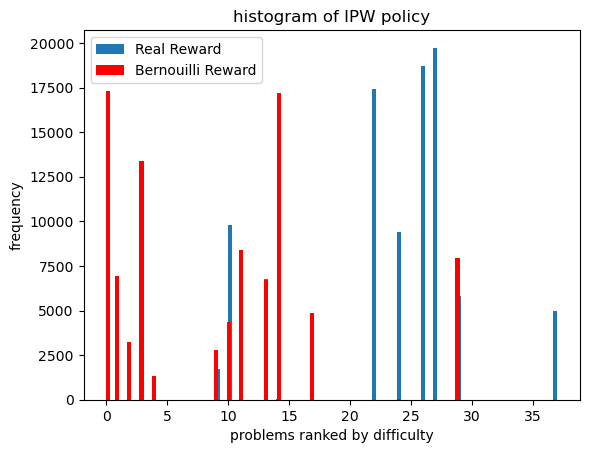

In [44]:
plt.hist(real_eval_policy_dist.argmax(1).flatten(),bins=85,label='Real Reward',histtype='stepfilled'),
plt.hist(bern_eval_policy_dist.argmax(1).flatten(),bins=85,color='r',label='Bernouilli Reward')
plt.title('histogram of IPW policy')
plt.xlabel('problems ranked by difficulty')
plt.ylabel('frequency')
plt.legend()


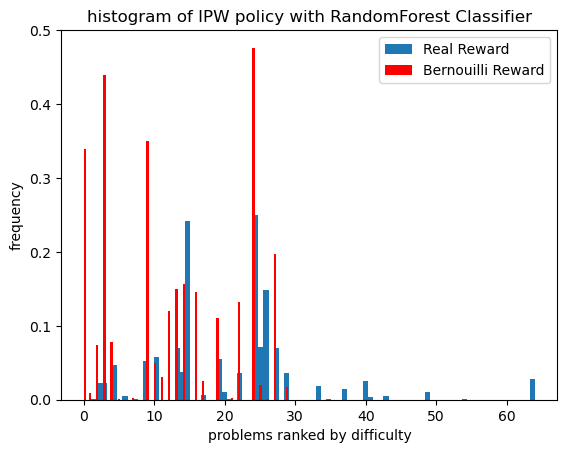

In [52]:
plt.hist(real_eval_policy_rf_dist.argmax(1).flatten(),bins=85,label='Real Reward',histtype='stepfilled',density=True),
plt.hist(bern_eval_policy_rf_dist.argmax(1).flatten(),bins=85,color='r',label='Bernouilli Reward',density=True)
plt.title('histogram of IPW policy with RandomForest Classifier')
plt.xlabel('problems ranked by difficulty')
plt.ylabel('frequency')
plt.legend()


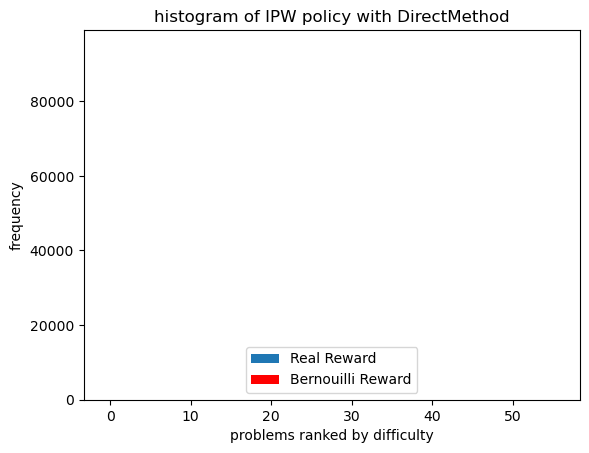

In [51]:
plt.hist(real_qlearner_dist.argmax(1).flatten(),bins=85,label='Real Reward',histtype='stepfilled'),
plt.hist(bern_qlearner_dist.argmax(1).flatten(),bins=85,color='r',label='Bernouilli Reward')
plt.title('histogram of IPW policy with DirectMethod')
plt.xlabel('problems ranked by difficulty')
plt.ylabel('frequency')
plt.legend()


In [49]:
bern_qlearner_dist.argmax(1).flatten()

array([0, 0, 0, ..., 0, 0, 0])